In [1]:
# Import standard dependencies
import cv2
import os
import random
import numpy as np
from matplotlib import pyplot as plt
from glob import *



In [2]:
# Import tensorflow dependencies - Functional API
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer, Conv2D, Dense, MaxPooling2D, Input, Flatten
import tensorflow as tf

In [5]:
import os
import uuid


In [ ]:
name=['Omar','Rana','Rahul']

# Distance layer

In [61]:
# Siamese L1 Distance class
class L1Dist(Layer):
    
    # Init method - inheritance
    def __init__(self, **kwargs):
        super().__init__()
       
    # Magic happens here - similarity calculation
    def call(self, input_embedding, validation_embedding):
        return tf.math.abs(input_embedding - validation_embedding)

# Verify the model

In [ ]:
# Reload model 
siamese_model = tf.keras.models.load_model('G:\\FaceRecognition-main\\siamesemodelv2.h5', 
                                   custom_objects={'L1Dist':L1Dist, 'BinaryCrossentropy':tf.losses.BinaryCrossentropy})#,compile=False)

In [81]:
# Get a batch of test data
test_input, test_val, y_true = test_data.as_numpy_iterator().next()

In [82]:
y_hat = siamese_model.predict([test_input, test_val])

In [83]:
# Post processing the results 
[1 if prediction > 0.5 else 0 for prediction in y_hat ]

[1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0]

In [84]:
y_true

array([1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0.],
      dtype=float32)

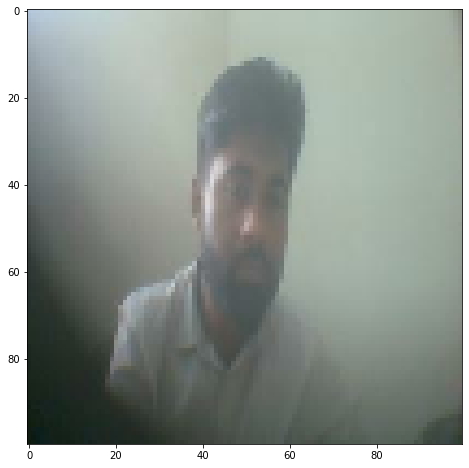

In [101]:
# 0th image is the face as Zeroth elemnet  of [1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0]  is one
# Set plot size 
plt.figure(figsize=(10,8))

# Set first subplot
#plt.subplot(1,2,1)
#plt.imshow(test_input[0])

# Set second subplot
#plt.subplot(1,2,2)
plt.imshow(test_val[0])

# Renders cleanly
plt.show()

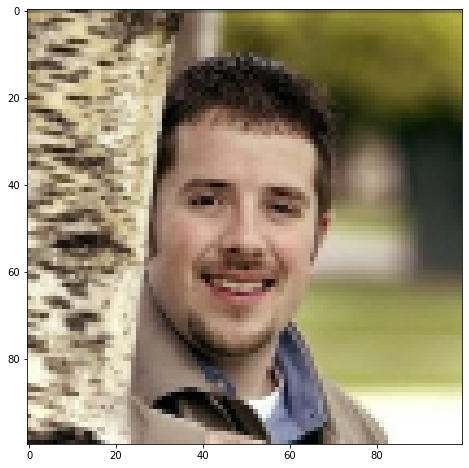

In [102]:
# 15th image is not the face as 15 of [1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0]  is zero
# Set plot size 
plt.figure(figsize=(10,8))

# Set first subplot
#plt.subplot(1,2,1)
plt.imshow(test_input[15])

# Set second subplot
#plt.subplot(1,2,2)
plt.imshow(test_val[15])

# Renders cleanly
plt.show()

In [90]:
# Make predictions with reloaded model
siamese_model.predict([test_input, test_val])

array([[9.9999917e-01],
       [8.1401188e-09],
       [9.6561652e-01],
       [9.7950232e-01],
       [3.5770391e-09],
       [9.9405158e-01],
       [1.0698736e-03],
       [6.9260500e-07],
       [9.6468937e-01],
       [1.8601431e-05],
       [9.9687111e-01],
       [1.3200641e-03],
       [9.6969026e-01],
       [1.1037290e-03],
       [2.3277405e-06],
       [9.2974305e-04]], dtype=float32)

In [ ]:
def preprocess(file_path):
    
    # Read in image from file path
    byte_img = tf.io.read_file(file_path)
    # Load in the image 
    img = tf.io.decode_jpeg(byte_img)
    
    # Preprocessing steps - resizing the image to be 100x100x3
    img = tf.image.resize(img, (100,100))
    # Scale image to be between 0 and 1 
    img = img / 255.0

    # Return image
    return img

In [92]:
def verify(model, detection_threshold, verification_threshold):
    # Build results array
    results = []
    for image in os.listdir(os.path.join('application_data', 'verification_images')):
        input_img = preprocess(os.path.join('application_data', 'input_image', 'input_image.jpg'))
        validation_img = preprocess(os.path.join('application_data', 'verification_images', image))
        
        # Make Predictions 
        result = model.predict(list(np.expand_dims([input_img, validation_img], axis=1)))
        results.append(result)
    
    # Detection Threshold: Metric above which a prediciton is considered positive 
    detection = np.sum(np.array(results) > detection_threshold)
    
    # Verification Threshold: Proportion of positive predictions / total positive samples 
    verification = detection / len(os.listdir(os.path.join('application_data', 'verification_images'))) 
    verified = verification > verification_threshold
    
    return results, verified


In [93]:
for image in os.listdir(os.path.join('application_data', 'verification_images')):
    validation_img = os.path.join('application_data', 'verification_images', image)
    print(validation_img)

application_data\verification_images\0303149c-f6e8-11ec-96ce-1c1b0d9c71e8.jpg
application_data\verification_images\0363439c-f6e8-11ec-a43b-1c1b0d9c71e8.jpg
application_data\verification_images\0369319c-f6e8-11ec-b4c1-1c1b0d9c71e8.jpg
application_data\verification_images\0379068a-f6e8-11ec-b395-1c1b0d9c71e8.jpg
application_data\verification_images\03a50170-f6e8-11ec-8bfa-1c1b0d9c71e8.jpg
application_data\verification_images\03ab3ec2-f6e8-11ec-9e9c-1c1b0d9c71e8.jpg
application_data\verification_images\03ae4a1e-f6e8-11ec-b331-1c1b0d9c71e8.jpg
application_data\verification_images\03b17c0a-f6e8-11ec-8c90-1c1b0d9c71e8.jpg
application_data\verification_images\03b485f6-f6e8-11ec-b42e-1c1b0d9c71e8.jpg
application_data\verification_images\03b76b6c-f6e8-11ec-95cc-1c1b0d9c71e8.jpg
application_data\verification_images\03bac336-f6e8-11ec-8e07-1c1b0d9c71e8.jpg
application_data\verification_images\03bdce64-f6e8-11ec-981c-1c1b0d9c71e8.jpg
application_data\verification_images\03c10080-f6e8-11ec-b5ab-1c1

In [ ]:
cap = cv2.VideoCapture(imagepath+'\\1.mp4')
while cap.isOpened():
    ret, frame = cap.read()
    frame = frame[120:120+250,200:200+250, :]
    #frame = Image.open(frame)
    #frame = frame.resize((250,250),Image.ANTIALIAS)
 
    
    cv2.imshow('Verification', frame)
    
    # Verification trigger
    if cv2.waitKey(10) & 0xFF == ord('v'):
        # Save input image to application_data/input_image folder 
#         hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
#         h, s, v = cv2.split(hsv)

#         lim = 255 - 10
#         v[v > lim] = 255
#         v[v <= lim] -= 10
        
#         final_hsv = cv2.merge((h, s, v))
#         img = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2BGR)

        cv2.imwrite(os.path.join('application_data', 'input_image', 'input_image.jpg'), frame)
        # Run verification
        results, verified = verify(siamese_model, 0.5, 0.5)
        print(verified)
        if varified==True:
            print("Wlcome to the app,"+name)
        else:
            Print("Please register the app if you are eligible")

    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()